# DTOcean Operations and Maintenance Test

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [4]:
import numpy as np

In [5]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import ModuleMenu, ProjectMenu
from dtocean_core.pipeline import Tree

In [6]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [7]:
# Bring up the logger
start_logging()

2016-12-16 14:58:07,082 - INFO - dtocean_core - Begin logging for dtocean_core.


## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [8]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
pipe_tree = Tree()

## Create a new project

In [9]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-12-16 14:58:13,618 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-12-16 14:58:13,618 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-12-16 14:58:13,618 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [10]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Tidal Fixed")
my_var.read(new_core, new_project)

2016-12-16 14:58:13,648 - INFO - aneris.control.data - New "device.system_type" data stored with index UFLNWQ
2016-12-16 14:58:13,648 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [11]:
project_menu.initiate_pipeline(new_core, new_project)

2016-12-16 14:58:13,648 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-12-16 14:58:13,680 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index LUPW88
2016-12-16 14:58:13,680 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-12-16 14:58:13,680 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-12-16 14:58:13,680 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [12]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate a module

Note that the order of activation is important and that we can't deactivate yet!

In [13]:
module_name = 'Operations and Maintenance'
module_menu.activate(new_core, new_project, module_name)

## Check the status of the module inputs

In [14]:
operations_branch = pipe_tree.get_branch(new_core, new_project, 'Operations and Maintenance')
input_status = operations_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [15]:
project_menu.initiate_dataflow(new_core, new_project)

2016-12-16 14:58:13,789 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index 63U8SU
2016-12-16 14:58:13,789 - INFO - aneris.control.simulation - Datastate stored
2016-12-16 14:58:13,805 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Load test data

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [16]:
%run inputs_wp6.py

generate test data: D:\Usuarios\108630\Programming\Python\notebooks\inputs_wp6.pkl


In [17]:
operations_branch.read_test_data(new_core,
                            new_project,
                            "inputs_wp6.pkl")

2016-12-16 14:58:40,611 - INFO - aneris.control.data - New "farm.moorings_operations_weighting" data stored with index QSIC2A
2016-12-16 14:58:40,611 - INFO - aneris.control.data - New "device.subsystem_costs" data stored with index UL8Q3W
2016-12-16 14:58:40,611 - INFO - aneris.control.data - New "device.inspections_requirements" data stored with index FBTF4I
2016-12-16 14:58:40,611 - INFO - aneris.control.data - New "component.split_pipes_installation" data stored with index DNW8QK
2016-12-16 14:58:40,611 - INFO - aneris.control.data - New "component.collection_points" data stored with index 7TZ9TG
2016-12-16 14:58:40,628 - INFO - aneris.control.data - New "component.moorings_forerunner_CFR" data stored with index JHTWNH
2016-12-16 14:58:40,628 - INFO - aneris.control.data - New "farm.electrical_subsystem_lead_times" data stored with index 702Z3A
2016-12-16 14:58:40,628 - INFO - aneris.control.data - New "component.ports" data stored with index 8W07TZ
2016-12-16 14:58:40,628 - INFO -

## Check if the module can be executed

In [18]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

True

In [19]:
input_status = operations_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Execute the current module

The "current" module refers to the next module to be executed in the chain (pipeline) of modules. This command will only execute that module and another will be used for executing all of the modules at once.

Note, any data supplied by the module will be automatically copied into the active data state.

In [20]:
module_menu.execute_current(new_core, new_project)

2016-12-16 14:58:42,703 - INFO - aneris.control.simulation - Datastate with level "operations and maintenance start" stored
2016-12-16 14:58:42,780 - INFO - dtocean_core.tools.operations - Annual operations start on date 1992-04-01 00:00:00
2016-12-16 14:58:42,796 - INFO - dtocean_core.tools.operations - Annual operations end on date 1992-10-31 23:59:59
2016-12-16 14:58:45,105 - INFO - dtocean_reliability.main - Start reliability calculation
2016-12-16 14:58:45,121 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:58:45,121 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:58:45,135 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:58:45,151 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated

C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_operations-0.2.1.dev0-py2.7.egg\dtocean_operations\arrayClass.py:451: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  eventsTable.sort(columns=self.__eventsTableKeys[1], inplace=True)
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_operations-0.2.1.dev0-py2.7.egg\dtocean_operations\arrayClass.py:474: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  eventsTableNoPoisson.sort(columns=self.__eventsTableKeys[5], inplace=True)
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_operations-0.2.1.dev0-py2.7.egg\dtocean_operations\mainCalc.py:1741: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  self.__CaBaMa_eventsTable.sort(columns=['startActionDate', 'ComponentSubType', 'FM_ID'], inplace=True)
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_operations-0.2.1.dev0-py2.7.egg\dtocean_operations\mainCalc.py:1744: FutureWarning: sort

2016-12-16 14:59:07,381 - INFO - dtocean_reliability.main - Start reliability calculation
2016-12-16 14:59:07,398 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:59:07,413 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:59:07,428 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:59:07,444 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:59:07,444 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:59:07,460 - INFO - dtocean_reliability.core - 
***************MTTF pass/fail******
Pass: calculated MTTF greater than required value
2016-12-16 14:59:13,496 - IN

C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_operations-0.2.1.dev0-py2.7.egg\dtocean_operations\mainCalc.py:2773: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  self.__CoBaMa_eventsTable.sort(columns=['currentAlarmDate'], inplace=True)


2016-12-16 14:59:39,065 - INFO - dtocean_logistics.performance.schedule.schedule_om - Could not find weather window before 1992 in year 1992-11-12 10:00:00
2016-12-16 14:59:39,082 - INFO - dtocean_logistics.performance.schedule.schedule_om - Could not find weather window before 1993 in year 1993-11-12 10:00:00
2016-12-16 14:59:39,082 - INFO - dtocean_logistics.performance.schedule.schedule_om - Could not find weather window before 1994 in year 1994-11-12 10:00:00
2016-12-16 14:59:39,082 - INFO - dtocean_logistics.performance.schedule.schedule_om - Could not find weather window before 1995 in year 1995-11-12 10:00:00
2016-12-16 14:59:39,082 - INFO - dtocean_logistics.performance.schedule.schedule_om - Could not find weather window before 1996 in year 1996-11-12 10:00:00
2016-12-16 14:59:39,082 - INFO - dtocean_logistics.performance.schedule.schedule_om - Could not find weather window before 1997 in year 1997-11-12 10:00:00
2016-12-16 14:59:39,096 - INFO - dtocean_logistics.performance.s

C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_core-0.8.3.dev0-py2.7.egg\dtocean_core\interfaces\operations.py:1337: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  comp_df = comp_df.convert_objects(convert_numeric=True)
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_core-0.8.3.dev0-py2.7.egg\dtocean_core\interfaces\operations.py:1394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  repair_df["repairActionRequestDate [-]"])
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_core-0.8.3.dev0-py2.7.egg\dtocean_core\interfaces\operations.py:1396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

2016-12-16 14:59:48,098 - INFO - aneris.control.data - New "farm.capex_oandm" data stored with index 0YACY6
2016-12-16 14:59:48,098 - INFO - aneris.control.data - New "farm.lifetime_energy" data stored with index V95855
2016-12-16 14:59:48,098 - INFO - aneris.control.data - New "farm.lifetime_opex" data stored with index 6EFHUO
2016-12-16 14:59:48,098 - INFO - aneris.control.data - New "farm.downtime_per_device" data stored with index Y04Q1I
2016-12-16 14:59:48,098 - INFO - aneris.control.data - New "farm.lifetime_energy_per_device" data stored with index DJWTC8
2016-12-16 14:59:48,114 - INFO - aneris.control.data - New "farm.array_downtime" data stored with index IAEEX3
2016-12-16 14:59:48,114 - INFO - aneris.control.data - New "farm.array_availability" data stored with index USW0L1
2016-12-16 14:59:48,114 - INFO - aneris.control.data - New "farm.uptime_series" data stored with index 7Q65JY
2016-12-16 14:59:48,114 - INFO - aneris.control.data - New "project.annual_opex" data stored wi

C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_core-0.8.3.dev0-py2.7.egg\dtocean_core\tools\operations.py:1133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_df["repairActionRequestDate [-]"])


## Examine the results

Currently, there is no robustness built into the core, so the assumption is that the module executed successfully. This will have to be improved towards deployment of the final software.

Examine the available outputs

In [21]:
output_status = operations_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [22]:
uptime_series = new_core.get_data_value(new_project, "farm.uptime_series")
uptime_series.plot()

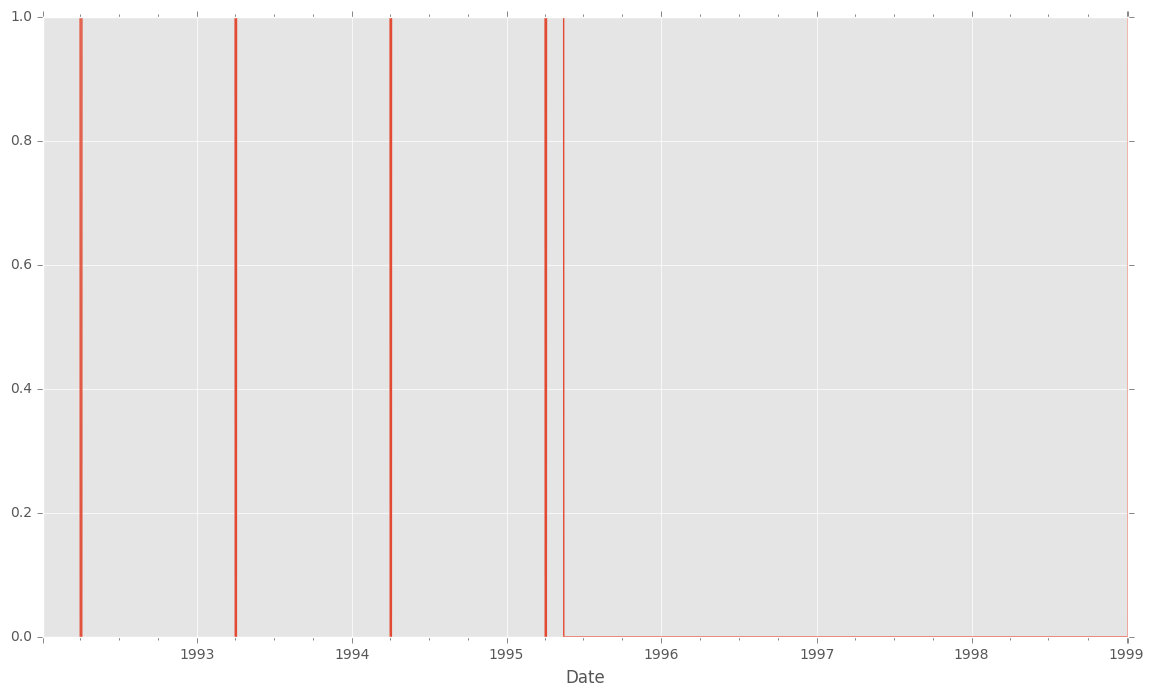

In [23]:
plt.show()

In [27]:
test = new_core.get_data_value(new_project, "farm.calendar_maintenance_events")
test

,Operation Request Date,Operation Completion Date,Downtime,Sub-System,Operation Type,Logistics Cost,Labour Cost,Parts Cost
0,1992-04-01 00:00:00,1992-04-03 22:00:00,295,Export Cable,Inspection,201012,168000,0
1,1992-04-01 00:00:00,1992-04-01 19:24:00,98,Prime Mover,On-Site Maintenance,583634,130950,41600
2,1992-04-01 00:00:00,1992-04-02 14:48:00,98,Prime Mover,On-Site Maintenance,583634,130950,41600
3,1992-04-01 00:00:00,1992-04-03 10:12:00,98,Prime Mover,On-Site Maintenance,583634,130950,41600
4,1992-04-01 00:00:00,1992-04-04 05:36:00,98,Prime Mover,On-Site Maintenance,583634,130950,41600
5,1992-04-01 00:00:00,1992-04-05 01:00:00,98,Prime Mover,On-Site Maintenance,583634,130950,41600
6,1992-04-01 00:00:00,1992-04-02 12:24:00,72,PTO,Inspection,229831,81900,0
7,1992-04-01 00:00:00,1992-04-03 06:36:00,72,PTO,Inspection,229831,81900,0
8,1992-04-01 00:00:00,1992-04-04 00:48:00,72,PTO,Inspection,229831,81900,0
9,1992-04-01 00:00:00,1992-04-04 19:00:00,72,PTO,Inspection,229831,81900,0
